In [100]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [101]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [102]:
import os
PATH='/content/gdrive/MyDrive/Flittfy' # This PATH may not work for you , change the path according to your file sysytem
os.chdir(PATH)

In [103]:
!ls

 Assignment.docx  'Copy of flittfy1.ipynb'   flittfy1.ipynb
 assignment.xlsx   data.csv


In [104]:
df = pd.read_excel('assignment.xlsx',na_values=['#','$',' '])

In [105]:
df = df.sort_values('Year')

In [106]:
df.head()

,Year,Month,Segment,Region,KPI,Value Type,Value
0,2020,12,Clients,India,Lv1_Visitors,Actuals,3665558
776,2020,9,Customers,Dehradun,Lv2_Visitors,Actuals,23693
777,2020,9,Customers,Faridabad,Lv2_Visitors,Actuals,23132
778,2020,9,Customers,Dehradun,Lv3_Visitors,Actuals,22715
779,2020,9,Customers,Ujjain,Lv2_Visitors,Actuals,22036


In [107]:
df.tail()

,Year,Month,Segment,Region,KPI,Value Type,Value
1092,2022,6,Customers,India,Lv1_Visitors,Actuals,506023
1093,2022,6,Customers,India,Lv2_Visitors,Actuals,325564
1094,2022,6,Customers,India,Lv3_Visitors,Actuals,192385
1096,2022,6,Customers,Uddepy,Lv2_Visitors,Actuals,57499
1571,2022,1,Customers,Aurangabad,Lv5_Visitors,Actuals,527


In [108]:
df['Year'].value_counts()

2022    660
2020    456
2021    456
Name: Year, dtype: int64

In [109]:
df['Month'].value_counts()

12    131
9     131
8     131
10    131
7     131
2     131
1     131
11    131
3     131
4     131
6     131
5     131
Name: Month, dtype: int64

In [110]:
df['Segment'].value_counts()

Customers    1080
Clients       492
Name: Segment, dtype: int64

In [111]:
df.dtypes

Year           int64
Month          int64
Segment       object
Region        object
KPI           object
Value Type    object
Value          int64
dtype: object

In [112]:
df.shape

(1572, 7)

In [113]:
df.nunique()

Year             3
Month           12
Segment          2
Region           7
KPI              5
Value Type       1
Value         1558
dtype: int64

It is difficult to determine the exact type of company that this dataset belongs to. However, based on the information available in the dataset, it appears to be a company that tracks and analyzes customer or visitor behavior. This could include companies in various industries, such as retail, e-commerce, tourism, or any other industry that involves customer interactions.

It is also possible that the levels of visitors could represent different types of customers based on their behavior, such as:
*   Level 1 Visitors: Users who have just visited the website and have not
registered or provided any personal information.
*   Level 2 Visitors: Registered users who have not made any purchases yet.
*   Level 3 Visitors: Users who have made one or more purchases on the website.
*   Level 4 Visitors: Loyal customers who make frequent purchases on the website.
*   Level 5 Visitors: VIP customers who make high-value purchases and receive special privileges or rewards.













In [114]:

# Create a pivot table
pivot_table = pd.pivot_table(df, values='Value', index=['Year', 'Month', 'Segment'], columns=['KPI', 'Value Type'], aggfunc='sum')

# Flatten the multi-level column index
pivot_table.columns = [f'{col[0]}_{col[1]}' for col in pivot_table.columns]

# Reset the index to include year and month
pivot_table.reset_index(inplace=True)


In [115]:
# Print the pivot table
pivot_table

,Year,Month,Segment,Lv1_Visitors_Actuals,Lv2_Visitors_Actuals,Lv3_Visitors_Actuals,Lv4_Visitors_Actuals,Lv5_Visitors_Actuals
0,2020,1,Clients,3322789,2304318,2410633,1157186,363939
1,2020,1,Customers,605252,460953,555356,235096,68562
2,2020,2,Clients,2976450,2021915,2101659,1011351,318689
3,2020,2,Customers,634726,488635,610242,260685,70144
4,2020,3,Clients,3453194,2334668,2440362,1186822,380754
...,...,...,...,...,...,...,...,...
67,2022,10,Customers,595663,418393,296815,94824,24425
68,2022,11,Clients,4857535,3089427,2352993,1118281,427054
69,2022,11,Customers,619135,444157,331189,109141,30289
70,2022,12,Clients,4392558,2819845,2358706,988546,107913


In [116]:
pivot_table.head()

,Year,Month,Segment,Lv1_Visitors_Actuals,Lv2_Visitors_Actuals,Lv3_Visitors_Actuals,Lv4_Visitors_Actuals,Lv5_Visitors_Actuals
0,2020,1,Clients,3322789,2304318,2410633,1157186,363939
1,2020,1,Customers,605252,460953,555356,235096,68562
2,2020,2,Clients,2976450,2021915,2101659,1011351,318689
3,2020,2,Customers,634726,488635,610242,260685,70144
4,2020,3,Clients,3453194,2334668,2440362,1186822,380754


In [117]:
# Print the pivot table
pivot_table.tail()

,Year,Month,Segment,Lv1_Visitors_Actuals,Lv2_Visitors_Actuals,Lv3_Visitors_Actuals,Lv4_Visitors_Actuals,Lv5_Visitors_Actuals
67,2022,10,Customers,595663,418393,296815,94824,24425
68,2022,11,Clients,4857535,3089427,2352993,1118281,427054
69,2022,11,Customers,619135,444157,331189,109141,30289
70,2022,12,Clients,4392558,2819845,2358706,988546,107913
71,2022,12,Customers,587719,400044,286948,92106,7303


In [118]:
grouped = df.groupby(['Year','Region']).sum()

In [119]:
pivot = grouped.pivot_table(values = 'Value', index = 'Year',columns = 'Region')

In [120]:
pivot

Region,Aurangabad,Dehradun,Faridabad,India,Indore,Uddepy,Ujjain
Year,,,,,,,
2020,285497.0,1172070.0,1170281.0,183457306.0,NaN,4376357.0,1176987.0
2021,300058.0,930998.0,1139358.0,116142601.0,NaN,3130906.0,920026.0
2022,196448.0,8212445.0,921404.0,110865565.0,3543866.0,22307017.0,5743265.0


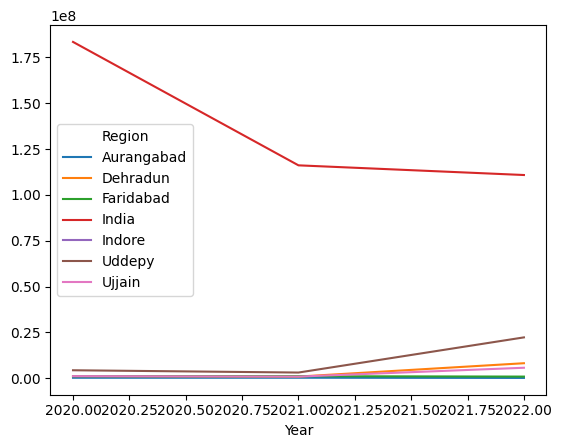

In [121]:
pivot.plot(kind ='line')
plt.show()

In [122]:
grouped = df.groupby(['Year','Region']).sum()

In [123]:
num = ['Value']

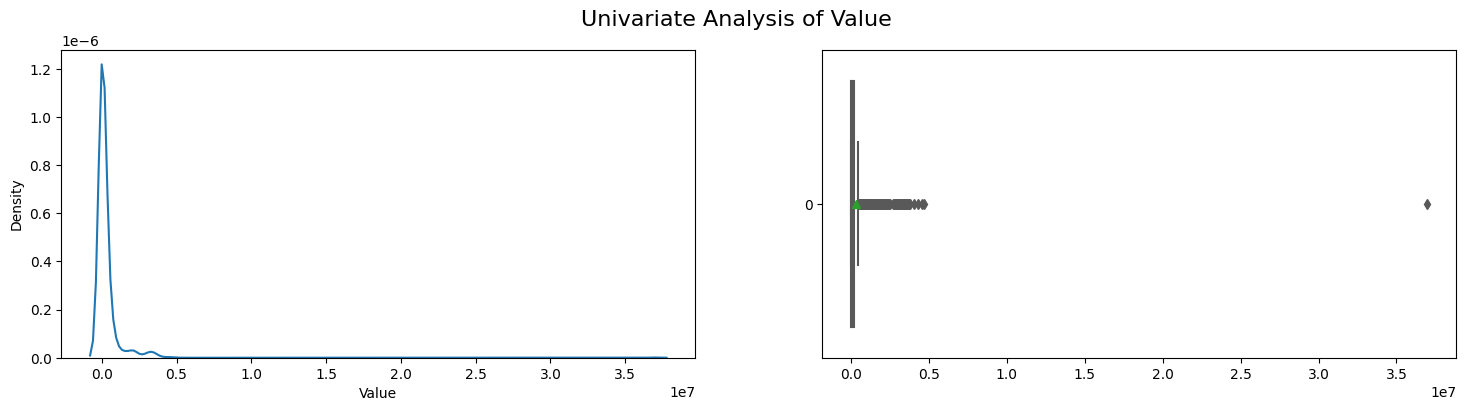

In [124]:
# check the ditribution for the numerical columns
x_axis = num
for x in x_axis:
 fig, axes = plt.subplots(1, 2, figsize=(18,4))
 sns.distplot(df[x], ax=axes[0], kde = True, hist=False)
 sns.boxplot(df[x], ax=axes[1], orient = "h", showmeans = True,palette="Set2")
 fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

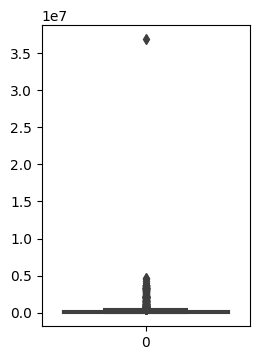

In [125]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num):
 plt.subplot(4,7,i+1)
 sns.boxplot(df[col])

In [126]:
df3 = df.copy()
def remove_outliers_IQR(col):
 # Finding the IQR
 percentile25 = df3[col].quantile(0.25)
 percentile75 = df3[col].quantile(0.75)
 print("percentile25",percentile25)
 print("percentile75",percentile75)
 iqr = percentile75 - percentile25
 upper_limit = percentile75 + 1.5 * iqr
 lower_limit = percentile25 - 1.5 * iqr
 print("Upper limit",upper_limit)
 print("Lower limit",lower_limit)
 df3[col] = np.where(df3[col]>upper_limit, upper_limit ,np.where(df3[col]<lower_limit,lower_limit,df3[col]))
 return df3[df3[col] > upper_limit]
 


In [127]:
def create_comparison_plot(data_df,df3,column):
 # Comparing
 plt.figure(figsize=(16,8))
 plt.subplot(2,2,1)
 sns.distplot(data_df[column])
 plt.subplot(2,2,2)
 sns.boxplot(data_df[column])
 plt.subplot(2,2,3)
 sns.distplot(df3[column])
 plt.subplot(2,2,4)
 sns.boxplot(df3[column])
 plt.show()

In [128]:
remove_outliers_IQR('Value')

percentile25 9247.75
percentile75 179681.0
Upper limit 435330.875
Lower limit -246402.125


,Year,Month,Segment,Region,KPI,Value Type,Value


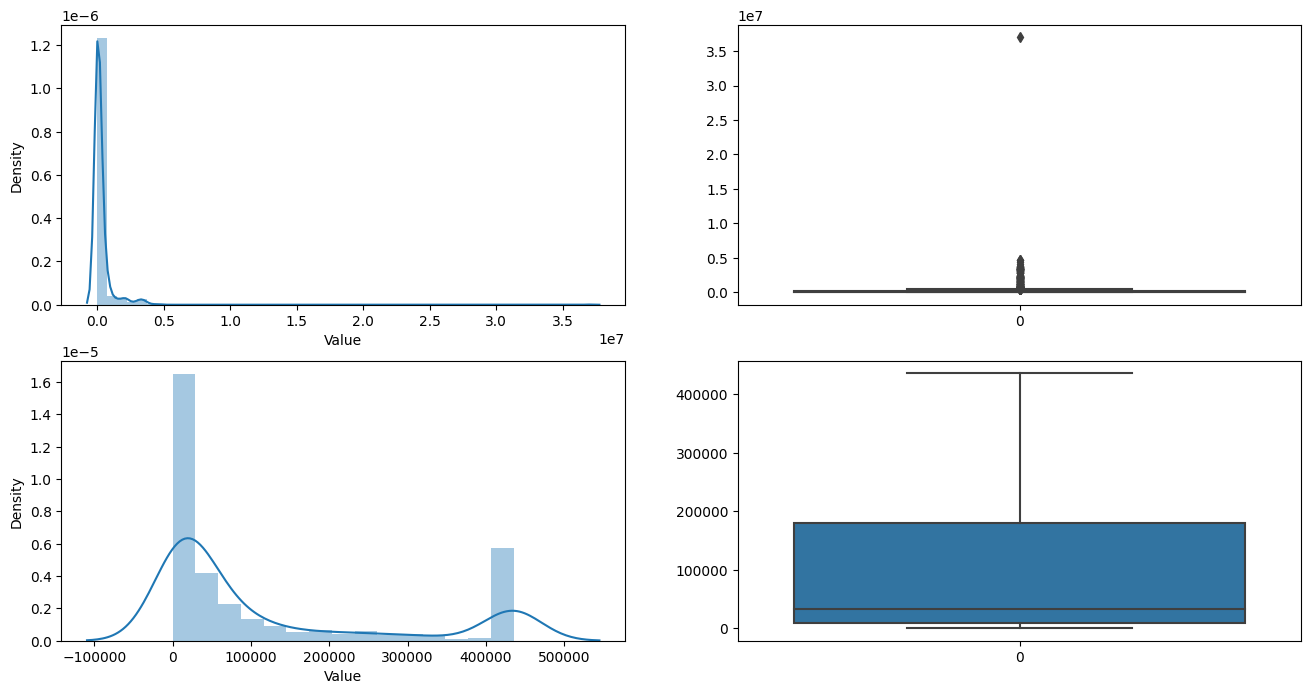

In [129]:
create_comparison_plot(df,df3,"Value")

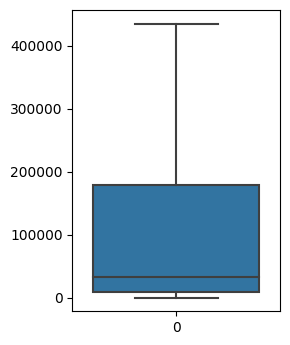

In [130]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num):
 plt.subplot(4,7,i+1)
 sns.boxplot(df3[col])

In [131]:
data = df.copy()

In [132]:
y = df.to_csv('data.csv')

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def predict_future(region='India', segment='Customers'):
    # read the data
    df = pd.read_csv('data.csv')
    
    # create a new column with the date format
    df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
    
    # filter by region and segment
    df = df[(df['Region'] == region) & (df['Segment'] == segment)]
    
    # filter by Level 5 visitors
    df_lv5 = df[df['KPI'] == 'Lv5_Visitors']
    
    # select the columns we need
    df_lv5 = df_lv5[['date', 'Value']]
    
    # set the date as the index
    df_lv5.set_index('date', inplace=True)
    
    # resample to monthly frequency
    df_lv5_monthly = df_lv5.resample('M').sum()
    
    # get the last date and add 1 month
    last_date = df_lv5_monthly.index[-1]
    next_date = last_date + timedelta(days=31)
    
    # create a date range for the next 6 months
    dates = pd.date_range(start=next_date, periods=6, freq='M')
    
    # create a DataFrame with the dates
    df_future = pd.DataFrame({'date': dates})
    
    # set the date as the index
    df_future.set_index('date', inplace=True)
    
    # make predictions using the mean of the last 12 months
    last_12_months = df_lv5_monthly.iloc[-12:]
    mean = last_12_months['Value'].mean()
    predictions = np.full((6,), mean)
    
    # add the predictions to the DataFrame
    df_future['Value'] = predictions
    
    # plot the actual and predicted values
    plt.plot(df_lv5_monthly.index, df_lv5_monthly['Value'], label='Actual')
    plt.plot(df_future.index, df_future['Value'], label='Predicted')
    plt.legend()
    plt.show()
    
    return df_future


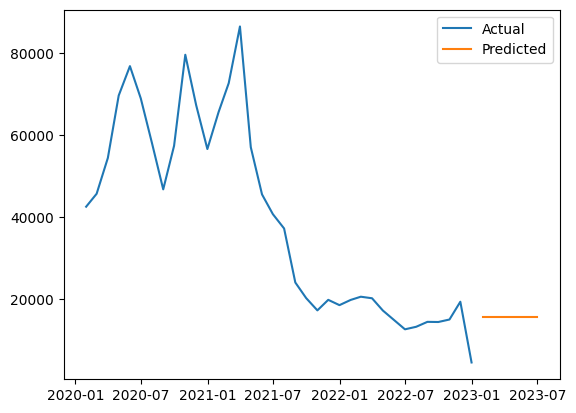

,Value
date,
2023-01-31,15595.833333
2023-02-28,15595.833333
2023-03-31,15595.833333
2023-04-30,15595.833333
2023-05-31,15595.833333
2023-06-30,15595.833333


In [134]:
predict_future('India', 'Customers')